In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn

In [3]:
from sklearn.datasets import load_boston
var = load_boston()

In [4]:
print(var.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [13]:
print(var.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
df = pd.DataFrame(var.data, columns = var.feature_names)

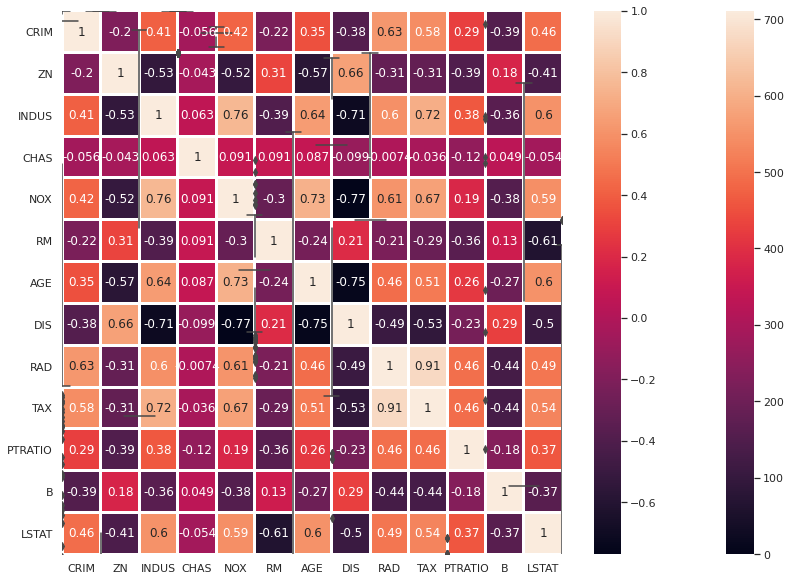

In [56]:
df.head()
df.describe()
df['MEDV'] = var.target
df.head()
df.info
df.isnull().sum()
seaborn.set(rc={"figure.figsize":(14, 10)}) #width=8, height=4
ax = seaborn.boxplot(data = df)
ax2 = seaborn.heatmap(df)

scaler = sklearn.preprocessing.MinMaxScaler()
normal = pd.DataFrame(scaler.fit_transform(var.data), columns = var.feature_names) #normalize the data
seaborn.heatmap(normal.corr(),annot=True,linewidths=2)

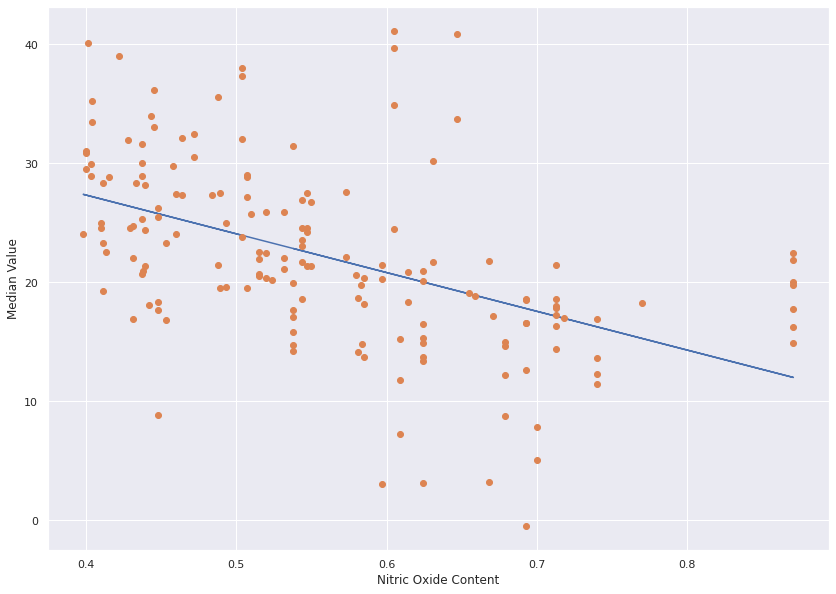

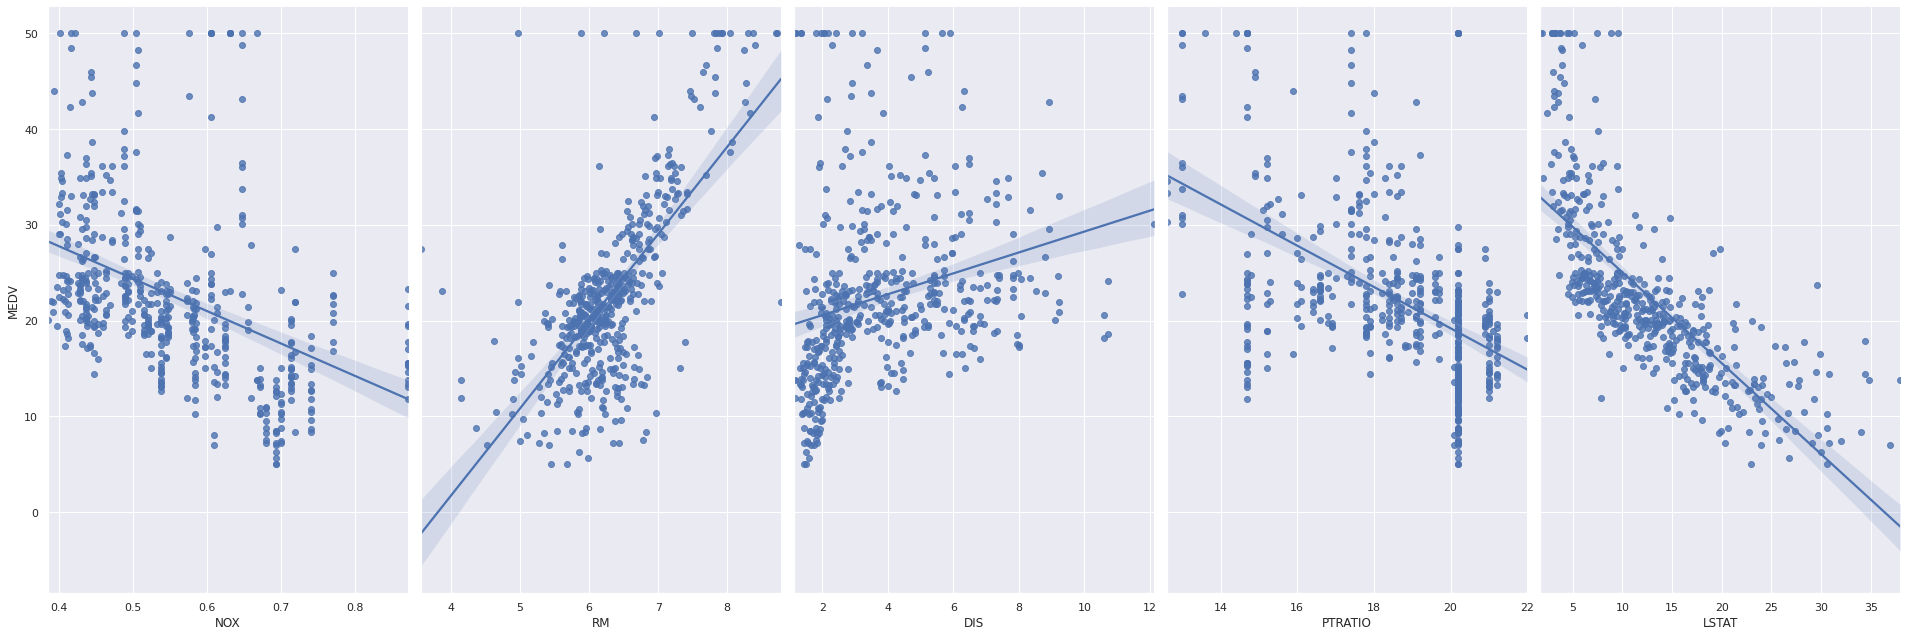

In [86]:
bdf = pd.DataFrame(var.data, columns = var.feature_names)
bdf['MEDV'] = var.target
x1 = bdf[['NOX','RM','DIS','PTRATIO','LSTAT']]
y1 = bdf['MEDV']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size =0.33,random_state = 5)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
metrics.mean_absolute_error(y_true= y_test, y_pred= y_pred)
metrics.mean_squared_error(y_true= y_test, y_pred= y_pred)
np.sqrt(metrics.mean_squared_error(y_true= y_test, y_pred= y_pred))
metrics.r2_score(y_true= y_test, y_pred= y_pred)
x1 = np.array(x_test['NOX'])
y1 = np.array(y_pred)
m,b=np.polyfit(x = x1, y = y1, deg = 1)
plt.plot(x_test['NOX'], m*x_test['NOX'] + b)
plt.plot(x_test['NOX'],y_pred,'o')
plt.xlabel("Nitric Oxide Content")
plt.ylabel("Median Value")
seaborn.pairplot(bdf, x_vars=['NOX','RM','DIS','PTRATIO','LSTAT'], y_vars='MEDV', height=9, aspect=0.6, kind='reg')